In [1]:
from fastai.vision.all import *
import numpy as np
import matplotlib.pyplot as plt

### Get the test data

In [2]:
path = Path('.')
Path.BASE_PATH = path

In [3]:
test_data = L(get_image_files(path/'data/mnist_png/testing'))

In [4]:
test_data

(#10000) [Path('data/mnist_png/testing/8/1389.png'),Path('data/mnist_png/testing/8/3012.png'),Path('data/mnist_png/testing/8/3389.png'),Path('data/mnist_png/testing/8/2142.png'),Path('data/mnist_png/testing/8/290.png'),Path('data/mnist_png/testing/8/5011.png'),Path('data/mnist_png/testing/8/4380.png'),Path('data/mnist_png/testing/8/4497.png'),Path('data/mnist_png/testing/8/465.png'),Path('data/mnist_png/testing/8/7378.png')...]

In [5]:
Image.open(test_data[0])

### Load the learner

In [6]:
# Have to define this here as well for load_learner to work
def rmse_loss(inp, targ, **kwargs):
    return torch.sqrt(F.mse_loss(inp, targ, **kwargs))

In [7]:
inf_learner = load_learner(path/'export.pkl')

### Get predictions on test data

In [8]:
test_dataloaders = inf_learner.dls.test_dl(test_data)

In [9]:
preds, _ = inf_learner.get_preds(dl=test_dataloaders)

In [10]:
preds.shape

torch.Size([10000, 1, 28, 28])

<AxesSubplot:>

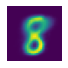

In [11]:
show_image(preds[0])

In [12]:
inf_learner.model

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=3136, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=3136, bias=True)
    (1): Unflatten(dim=1, unflattened_size=torch.Size([64, 7, 7]))
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Lea